In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

#Convert to binary 0 or Not 0
y_train_bin = (y_train == 0).astype(int)
y_test_bin = (y_test == 0).astype(int)

print("Binary labels:", np.unique(y_train_bin))
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Binary labels: [0 1]
Train shape: (60000, 784) Test shape: (10000, 784)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train binary logistic regression
model = LogisticRegression(
    solver='saga',
    max_iter=1000,
    n_jobs=-1
)
model.fit(X_train, y_train_bin)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print(classification_report(y_test_bin, y_pred))


Accuracy: 0.9924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9020
           1       0.95      0.97      0.96       980

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



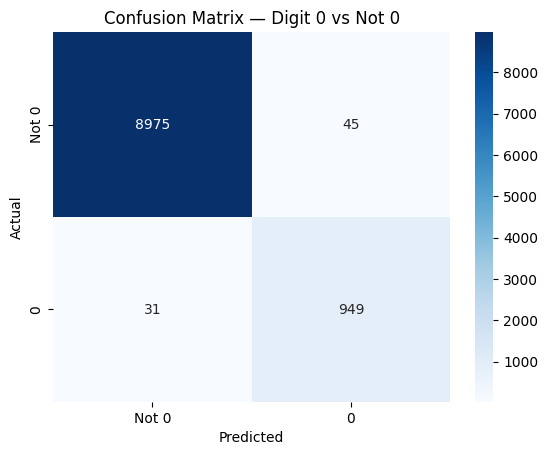

In [5]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not 0', '0'], yticklabels=['Not 0', '0'])
plt.title("Confusion Matrix — Digit 0 vs Not 0")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


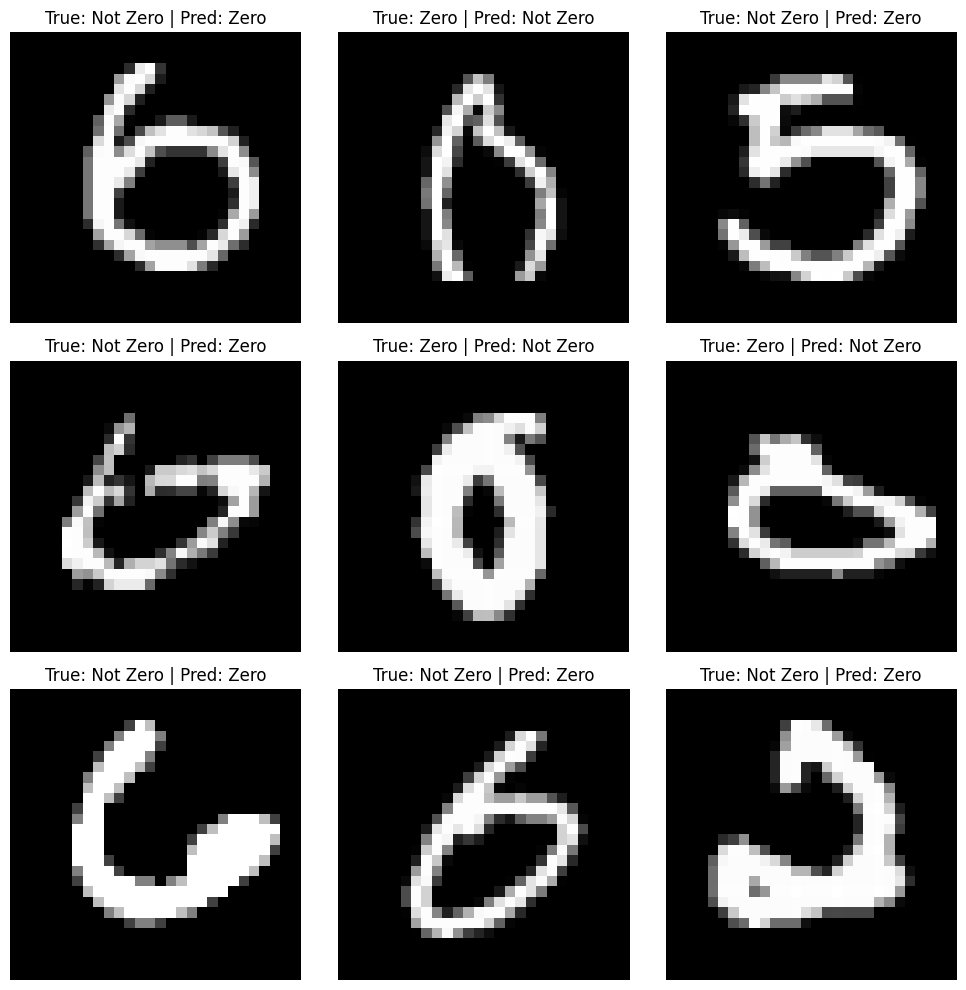

In [6]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

misclassified = np.where(y_pred != y_test_bin)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {'Not Zero' if y_test_bin[idx]==0 else 'Zero'} | Pred: {'Not Zero' if y_pred[idx]==0 else 'Zero'}")
    plt.axis('off')
plt.tight_layout()
plt.show()